In [1]:
# eq of a hyperbola
var('x', 'cx', 'y', 'a', 'b')
eq = ((x-cx)/a)**2 - (y/b)**2 == 1
show(eq)

(cx - x)^2/a^2 - y^2/b^2 == 1

0.31800486063545774*(x + 0.301732135476458)^2 - 0.147210578267391*y^2 == 1

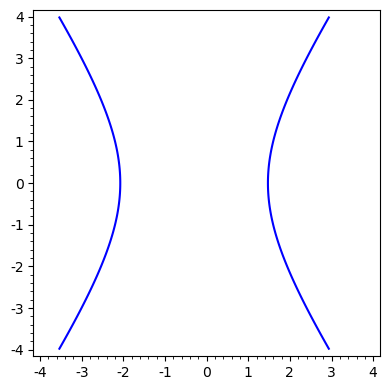

In [2]:
# pick a random hyperbola
import random
a_min = 1
a_max = 2
cx_max = 1
ab_ratio = 1 + (random.random() - .5) * 1
a_true = random.random() * (a_max - a_min) + a_min
b_true = a_true * ab_ratio
cx_true = (random.random() - .5) * 2 * cx_max
eq1 = eq(a=a_true, b=b_true, cx=cx_true)
show(eq1)
def plot_h(h, color='blue', x_min=-2*a_max, x_max=2*a_max, y_min=-2*a_max, y_max=2*a_max):
    return implicit_plot(h, (x_min, x_max), (y_min,y_max), color=color)
true_plot = plot_h(eq1)
true_plot

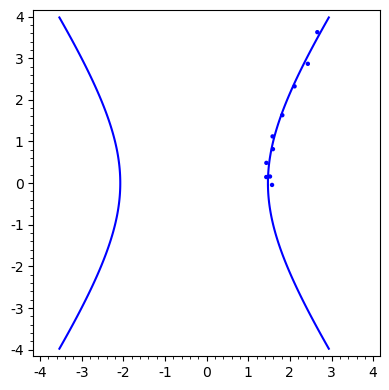

In [7]:
# sample some points from the hyperbola, with x>0, y>0, and add noise
num_points = 10
y_max = a_max * 2

x_of_y = solve(eq1, x)[1]
ys = [((y0+.5)/num_points)**2 * y_max for y0 in range(num_points)]
xs = [x_of_y(y=y0).right() for y0 in ys]

# apply noise
dx = a_max/20
dy = a_max/20
xs = [x0 + (random.random() - .5) * 2 * dx for x0 in xs]
ys = [y0 + (random.random() - .5) * 2 * dy for y0 in ys]

true_plot + point(list(zip(xs, ys)))

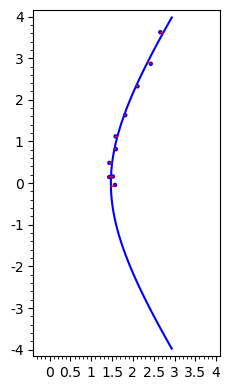

In [8]:
# shortest distance hyperbola to point

def dist2(a, b):
    return ((a[0] - b[0]) ** 2 + (a[1] - b[1]) ** 2).n()

def closest_point(h, px, py):
    x_min = max([sol.right() for sol in solve(h(y=0), x)]).n() + 1e-3
    x_max = max(px, x_min) + a_max*2
    y_of_xs = solve(h, y)
    y_of_x = y_of_xs[0] if (y_of_xs[0](x=x_max).right() - y_of_xs[1](x=x_max).right()) * py > 0 else y_of_xs[1]
    f_dist2 = lambda p: dist2((p[0], y_of_x(x=p[0]).right().n()), (px, py))
    def g_dist2(p):
        if p[0] < x_min:
            return 1e3
        else:
            return dist2((p[0], y_of_x(x=p[0]).right().n()), (px, py))
    x0 = minimize_constrained(g_dist2, [lambda p: p[0] - x_min], [max(x_min + .01, px)])[0]
    y0 = y_of_x(x=x0).right()
    return (x0, y0)

G = plot_h(eq1, x_min=cx_true) + point(list(zip(xs, ys)))
for (x0, y0) in zip(xs, ys):
    #print(x0, y0)
    G += line([(x0, y0), closest_point(eq1, x0, y0)], rgbcolor=(1,0,0))
G

In [9]:
# optimize to fit a hyperbola to the samples

def cost(abc):
    a, b, cx = abc
    h = eq(a=a, b=b, cx=cx)
    return sum([dist2(p, closest_point(h, p[0], p[1])) for p in zip(xs, ys)])

from scipy.optimize import minimize
abc = [a_max/2, a_max/2, 0]
res = minimize(cost, abc, method='nelder-mead')
print(res)

 final_simplex: (array([[ 1.47982700e+00,  2.32896101e+00, -4.98667773e-04],
       [ 1.47982355e+00,  2.32895450e+00, -4.98945623e-04],
       [ 1.47982261e+00,  2.32893078e+00, -4.98918589e-04],
       [ 1.47981979e+00,  2.32893908e+00, -4.98969625e-04]]), array([0.03424814, 0.03425422, 0.03425719, 0.03427119]))
           fun: 0.03424814357361571
       message: 'Optimization terminated successfully.'
          nfev: 112
           nit: 49
        status: 0
       success: True
             x: array([ 1.47982700e+00,  2.32896101e+00, -4.98667773e-04])


	Correct   	Measured  	Error     
b/a	1.470    	1.574    	7.079%
cx	-0.302    	-0.000    	0.301


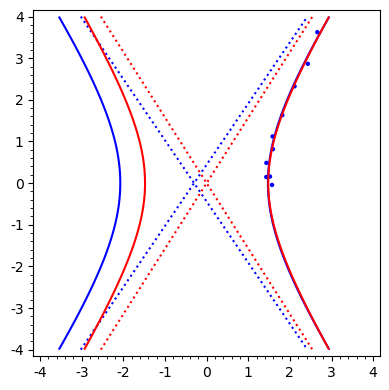

In [24]:
a_test, b_test, cx_test = res.x
h = eq(a=a_test, b=b_test, cx=cx_test)
print("\t{:10s}\t{:10s}\t{:10s}".format("Correct", "Measured", "Error"))
print("b/a\t{:.3f}    \t{:.3f}    \t{:.3f}%".format(float(b_true/a_true), float(b_test/a_test), float(abs(100*b_test/a_test / (b_true/a_true) - 100))))
print("cx\t{:.3f}    \t{:.3f}    \t{:.3f}".format(float(cx_true), cx_test, abs(cx_true - cx_test)))


def asym(a, b, cx, sign, color):
    bounds = (-2*a_max, 2*a_max)
    return implicit_plot(y == sign * b/a * (x-cx), bounds, bounds, color=color, linestyle=":")
asymptotes  = asym(a_true, b_true, cx_true, 1, 'blue') + asym(a_true, b_true, cx_true, -1, "blue")
asymptotes += asym(a_test, b_test, cx_test, 1, 'red' ) + asym(a_test, b_test, cx_test, -1, "red" )

true_plot + asymptotes + point(list(zip(xs, ys))) + plot_h(h, 'red')